In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

In [2]:
df = pd.read_csv('order.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18,29,30,34,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.dtypes

Name                            object
Financial Status                object
Paid at                         object
Fulfillment Status              object
Accepts Marketing               object
Currency                        object
Subtotal                       float64
Shipping                       float64
Taxes                          float64
Total                          float64
Discount Code                   object
Discount Amount                float64
Shipping Method                 object
Created at                      object
Lineitem quantity                int64
Lineitem name                   object
Lineitem price                 float64
Lineitem compare at price      float64
Lineitem sku                    object
Lineitem fulfillment status     object
Shipping Street                 object
Shipping Address1               object
Shipping Address2               object
Shipping Company                object
Shipping City                   object
Shipping Zip             

In [4]:
df.shape

(85925, 42)

In [5]:
df.columns.groupby(df.dtypes)

{dtype('int64'): Index(['Lineitem quantity'], dtype='object'),
 dtype('float64'): Index(['Subtotal', 'Shipping', 'Taxes', 'Total', 'Discount Amount',
        'Lineitem price', 'Lineitem compare at price', 'Refunded Amount',
        'Tax 3 Name'],
       dtype='object'),
 dtype('O'): Index(['Name', 'Financial Status', 'Paid at', 'Fulfillment Status',
        'Accepts Marketing', 'Currency', 'Discount Code', 'Shipping Method',
        'Created at', 'Lineitem name', 'Lineitem sku',
        'Lineitem fulfillment status', 'Shipping Street', 'Shipping Address1',
        'Shipping Address2', 'Shipping Company', 'Shipping City',
        'Shipping Zip', 'Shipping Province', 'Shipping Country', 'Notes',
        'Note Attributes', 'Cancelled at', 'Payment Method', 'Vendor', 'Tags',
        'Risk Level', 'Source', 'Lineitem name.1', 'Color ', 'Unnamed: 39',
        'Unnamed: 40'],
       dtype='object')}

## Drop columns that provides limited information and remove pending payment but fulfilled 

In [69]:
df.drop(['Unnamed: 39', 'Unnamed: 40', 'Tax 3 Name', 'Note Attributes', 'Tags', 'Shipping Address2'], axis=1, inplace=True)

In [70]:
df_drop=df[(df['Financial Status']=='pending')&(df['Fulfillment Status']=='fulfilled')]

In [72]:
pd.concat([df, df_drop]).drop_duplicates(keep=False)

,Name,Financial Status,Paid at,Fulfillment Status,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,...,Refunded Amount,Vendor,Risk Level,Source,Lineitem name.1,Color,month,year,day,revenue
0,#4746,paid,7/16/18 12:31,unfulfilled,yes,USD,100.50,13.64,0.00,114.14,...,0.00,US Jewelry House,Low,web,Turquoise Crystal Rhinestone Ring,GDTQ,7,2018,16,100.50
1,#4746,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,0.00,US Jewelry House,NaN,NaN,Turquoise Crystal Rhinestone Ring,GDTQ,7,2018,16,0.00
2,#4746,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,0.00,impression,NaN,NaN,Tri Tone Cubic Zirconia Paved Simple Band Ring...,Size 8,7,2018,16,0.00
3,#4746,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,0.00,Ella,NaN,NaN,Geometric Tortoise Link Long Necklace,Brown,7,2018,16,0.00
4,#4746,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,0.00,Stylist,NaN,NaN,Acetate Skinny Bangle Bracelet With Front Clos...,White/Brown,7,2018,16,0.00
5,#4746,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,0.00,Cloie,NaN,NaN,Modern Acetate Hoop Earrings,Multi,7,2018,16,0.00
6,#4746,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,0.00,USJewelryhouse,NaN,NaN,Knot Ear Studs,Gold,7,2018,16,0.00
7,#4746,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,0.00,USJewelryhouse,NaN,NaN,Texture Link Earrings,Gold,7,2018,16,0.00
8,#4746,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,0.00,Fresh,NaN,NaN,Hemisphere Mini Studs Earrings,Multi,7,2018,16,0.00
9,#4746,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,0.00,USJewelryhouse,NaN,NaN,Lightweight Geometric Bar Hoop Earrings,SGSG,7,2018,16,0.00


In [73]:
df['Lineitem compare at price']=df['Lineitem compare at price'].astype(float)

In [74]:
df.isna().sum(axis = 0).sort_values(ascending = False)/85925

Cancelled at                   0.999348
Notes                          0.996928
Discount Code                  0.995263
Paid at                        0.988548
Shipping Province              0.956858
Shipping Method                0.956672
Shipping Zip                   0.956567
Shipping Company               0.956543
Shipping Street                0.956485
Shipping Country               0.956485
Shipping Address1              0.956485
Shipping City                  0.956485
Risk Level                     0.956404
Total                          0.956404
Taxes                          0.956404
Shipping                       0.956404
Currency                       0.956404
Source                         0.956404
Financial Status               0.956404
Fulfillment Status             0.956404
Payment Method                 0.956404
Accepts Marketing              0.956404
Lineitem compare at price      0.917952
Lineitem sku                   0.519674
Color                          0.116741


In [8]:
df.groupby('Name').agg(sum).tail(15)

,Subtotal,Shipping,Taxes,Total,Discount Amount,Lineitem quantity,Lineitem price,Lineitem compare at price,Refunded Amount,Tax 3 Name
Name,,,,,,,,,,
#4732,150.00,10.47,0.00,160.47,0.00,34,61.25,0.00,0.00,0.0
#4733,253.00,0.00,0.00,253.00,0.00,69,69.75,4.75,53.25,0.0
#4734,358.75,0.00,1.60,360.35,0.00,76,219.75,6.25,44.00,0.0
#4735,139.75,12.96,0.00,152.71,0.00,32,119.50,0.00,8.50,0.0
#4736,1016.27,0.00,0.00,1016.27,53.48,202,626.25,26.25,0.00,0.0
#4737,1521.23,0.00,0.00,1521.23,169.02,135,348.75,0.00,0.00,0.0
#4738,5.75,10.47,0.00,16.22,0.00,2,5.75,0.00,0.00,0.0
#4739,76.00,10.47,0.00,86.47,0.00,2,76.00,0.00,0.00,0.0
#4740,263.75,0.00,0.00,263.75,0.00,47,101.50,0.00,0.00,0.0


In [9]:
df.groupby(['Name','Vendor']).agg(sum).tail(15)

Subtotal  Shipping  Taxes   Total  Discount Amount  \
Name  Vendor                                                                 
#4744 andante             399.75      0.00    0.0  399.75              0.0   
      core                  0.00      0.00    0.0    0.00              0.0   
      ruff-skch             0.00      0.00    0.0    0.00              0.0   
#4745 Cloie               195.00     12.96    0.0  207.96              0.0   
      moment                0.00      0.00    0.0    0.00              0.0   
      ruff-skch             0.00      0.00    0.0    0.00              0.0   
#4746 Cloie                 0.00      0.00    0.0    0.00              0.0   
      Ella                  0.00      0.00    0.0    0.00              0.0   
      Fresh                 0.00      0.00    0.0    0.00              0.0   
      IT'S sense            0.00      0.00    0.0    0.00              0.0   
      Stylist               0.00      0.00    0.0    0.00              0.0   
      US Jewelry House    100.50     13.64    0.0  114.14              0.0   
      USJewelryhouse        0.00      0.00    0.0    0.00              0.0   
      andante               0.00      0.00    0.0    0.00              0.0   
      impression            0.00      0.00    0.0    0.00              0.0   

                        Lineitem quantity  Lineitem price  \
Name  Vendor                                                
#4744 andante                           9           28.50   
      core                              2            3.75   
      ruff-skch                         2           10.50   
#4745 Cloie                            35           14.00   
      moment                           31           24.00   
      ruff-skch                         3            6.00   
#4746 Cloie                             6           17.00   
      Ella                              2           12.50   
      Fresh                             1            5.00   
      IT'S sense                        4           13.25   
      Stylist                           1            5.25   
      US Jewelry House                  2            6.75   
      USJewelryhouse                    5           16.50   
      andante                           1            5.00   
      impression                        1           10.50   

                        Lineitem compare at price  Refunded Amount  Tax 3 Name  
Name  Vendor                                                                    
#4744 andante                                0.00              0.0         0.0  
      core                                   0.00              0.0         0.0  
      ruff-skch                              0.00              0.0         0.0  
#4745 Cloie                                 32.75              0.0         0.0  
      moment                                31.50              0.0         0.0  
      ruff-skch                              0.00              0.0         0.0  
#4746 Cloie                                  0.00              0.0         0.0  
      Ella                                   0.00              0.0         0.0  
      Fresh                                  0.00              0.0         0.0  
      IT'S sense                             0.00              0.0         0.0  
      Stylist                                0.00              0.0         0.0  
      US Jewelry House                       0.00              0.0         0.0  
      USJewelryhouse                         3.50              0.0         0.0  
      andante                                0.00              0.0         0.0  
      impression                             0.00              0.0         0.0

In [10]:
df.groupby(['Name','Vendor','Lineitem fulfillment status']).sum().tail(15)

Subtotal  Shipping  Taxes  \
Name  Vendor           Lineitem fulfillment status                              
#4744 andante          pending                        399.75      0.00    0.0   
      core             pending                          0.00      0.00    0.0   
      ruff-skch        pending                          0.00      0.00    0.0   
#4745 Cloie            pending                        195.00     12.96    0.0   
      moment           pending                          0.00      0.00    0.0   
      ruff-skch        pending                          0.00      0.00    0.0   
#4746 Cloie            pending                          0.00      0.00    0.0   
      Ella             pending                          0.00      0.00    0.0   
      Fresh            pending                          0.00      0.00    0.0   
      IT'S sense       pending                          0.00      0.00    0.0   
      Stylist          pending                          0.00      0.00    0.0   
      US Jewelry House pending                        100.50     13.64    0.0   
      USJewelryhouse   pending                          0.00      0.00    0.0   
      andante          pending                          0.00      0.00    0.0   
      impression       pending                          0.00      0.00    0.0   

                                                     Total  Discount Amount  \
Name  Vendor           Lineitem fulfillment status                            
#4744 andante          pending                      399.75              0.0   
      core             pending                        0.00              0.0   
      ruff-skch        pending                        0.00              0.0   
#4745 Cloie            pending                      207.96              0.0   
      moment           pending                        0.00              0.0   
      ruff-skch        pending                        0.00              0.0   
#4746 Cloie            pending                        0.00              0.0   
      Ella             pending                        0.00              0.0   
      Fresh            pending                        0.00              0.0   
      IT'S sense       pending                        0.00              0.0   
      Stylist          pending                        0.00              0.0   
      US Jewelry House pending                      114.14              0.0   
      USJewelryhouse   pending                        0.00              0.0   
      andante          pending                        0.00              0.0   
      impression       pending                        0.00              0.0   

                                                    Lineitem quantity  \
Name  Vendor           Lineitem fulfillment status                      
#4744 andante          pending                                      9   
      core             pending                                      2   
      ruff-skch        pending                                      2   
#4745 Cloie            pending                                     35   
      moment           pending                                     31   
      ruff-skch        pending                                      3   
#4746 Cloie            pending                                      6   
      Ella             pending                                      2   
      Fresh            pending                                      1   
      IT'S sense       pending                                      4   
      Stylist          pending                                      1   
      US Jewelry House pending                                      2   
      USJewelryhouse   pending                                      5   
      andante          pending                                      1   
      impression       pending                                      1   

                                                    Lineitem price  \
Name  Vendor      

#### Top vendors - sales

In [11]:
df.groupby('Vendor').sum()['Subtotal'].sort_values(ascending = False).head(15)

Vendor
USJewelryhouse      346974.76
romance              70835.40
Fresh                53812.28
Cloie                53204.44
andante              30994.42
Dorothy              30086.15
US Jewelry House     29905.12
Crystal Avenue       29785.58
IT'S sense           29070.94
Jennifer             23837.17
ruff-skch            21968.15
moment               16690.18
POMINA               16276.41
core                 15686.02
3AM                  14245.73
Name: Subtotal, dtype: float64

#### Top vedors - Refund 

In [12]:
df.groupby('Vendor').sum()['Refunded Amount'].sort_values(ascending = False).head(15)

Vendor
USJewelryhouse      55317.89
romance             12681.26
Cloie                7114.17
Crystal Avenue       5323.88
andante              5236.46
Fresh                5018.22
ruff-skch            5010.83
Dorothy              4666.30
IT'S sense           4610.30
Jennifer             4372.08
POMINA               3281.99
core                 2955.85
US Jewelry House     2598.79
BARRING              2417.71
vera                 2401.73
Name: Refunded Amount, dtype: float64

In [14]:
df['Created at'] = pd.to_datetime(df['Created at'])

In [78]:
df['month'] = df['Created at'].dt.month

In [16]:
df['year'] = df['Created at'].dt.year

In [17]:
df['day'] = df['Created at'].dt.day

#### Monthly sales from 2015 to 2018

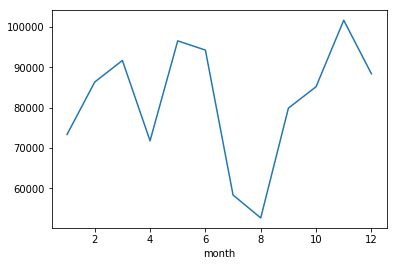

In [18]:
df.groupby('month')['Subtotal'].sum().plot()

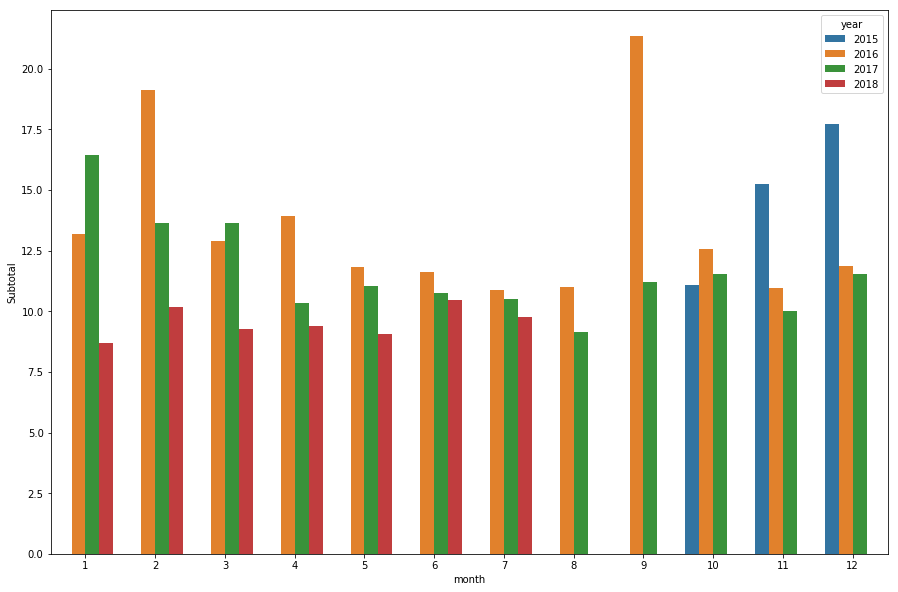

In [58]:
plt.figure(figsize=(15,10))
sns.barplot(x="month", y="Subtotal", hue="year",ci=None,data=df)

#### Monthly refund from 2015 to 2018

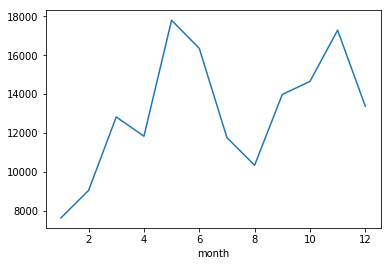

In [19]:
df.groupby('month')['Refunded Amount'].sum().plot()

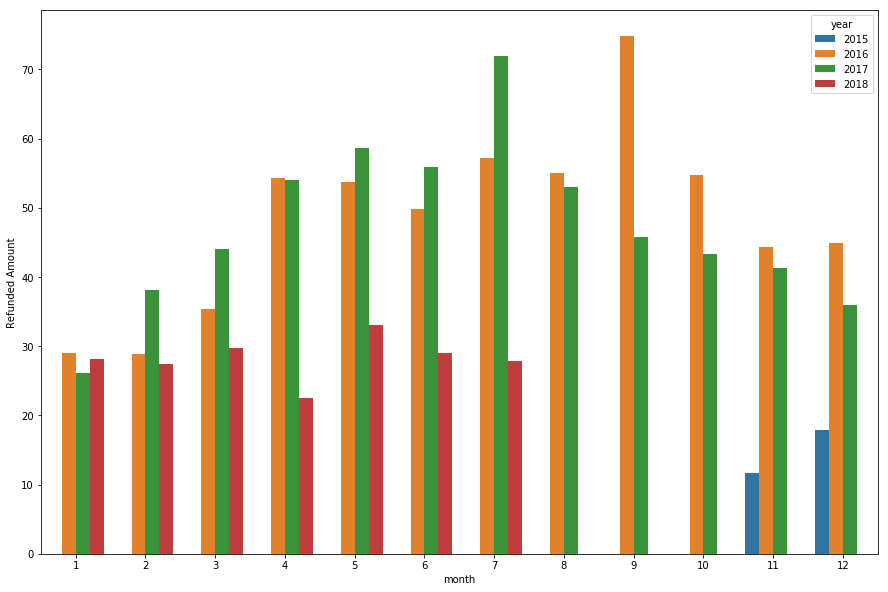

In [22]:
plt.figure(figsize=(15,10))
sns.barplot(x="month", y="Refunded Amount",hue="year",ci=None,data=df)

In [23]:
df['Risk Level'].value_counts()

Low       3665
Medium      64
High        17
Name: Risk Level, dtype: int64

### Top line items

In [24]:
df['Lineitem name'].value_counts().sort_values(ascending = False).head(15)

Urban Geometric Metal Hoop Earrings - Gold               240
Lightweight Urban Brass Earrings - Gold                  174
Urban Geometric Metal Hoop Earrings - Silver             164
Lightweight Urban Brass Earrings - Silver                140
Geometric Metal Hoop Earrings - Gold                     121
Unisex Leather Bracelet                                  119
Lightweight Filigree Earrings - Gold                      99
Urban Geometric Metal Hoop Earrings - Rose Gold           97
Stering Silver Cubic Zirconia Studs Earrings - Silver     84
Bohemian Magnetic Bracelet                                84
Lightweight Filigree Earrings - Rhodium                   83
Multi Charm Bohemian Choker - Black                       82
Filigree Earrings - Gold                                  79
Lace Choker                                               76
Stering Silver Cubic Zirconia Studs Earrings - Gold       71
Name: Lineitem name, dtype: int64

### Top Sale States

In [25]:
geodf=df.groupby('Shipping Province', as_index= False).sum().sort_values(by = 'Subtotal', ascending = False).head(15)

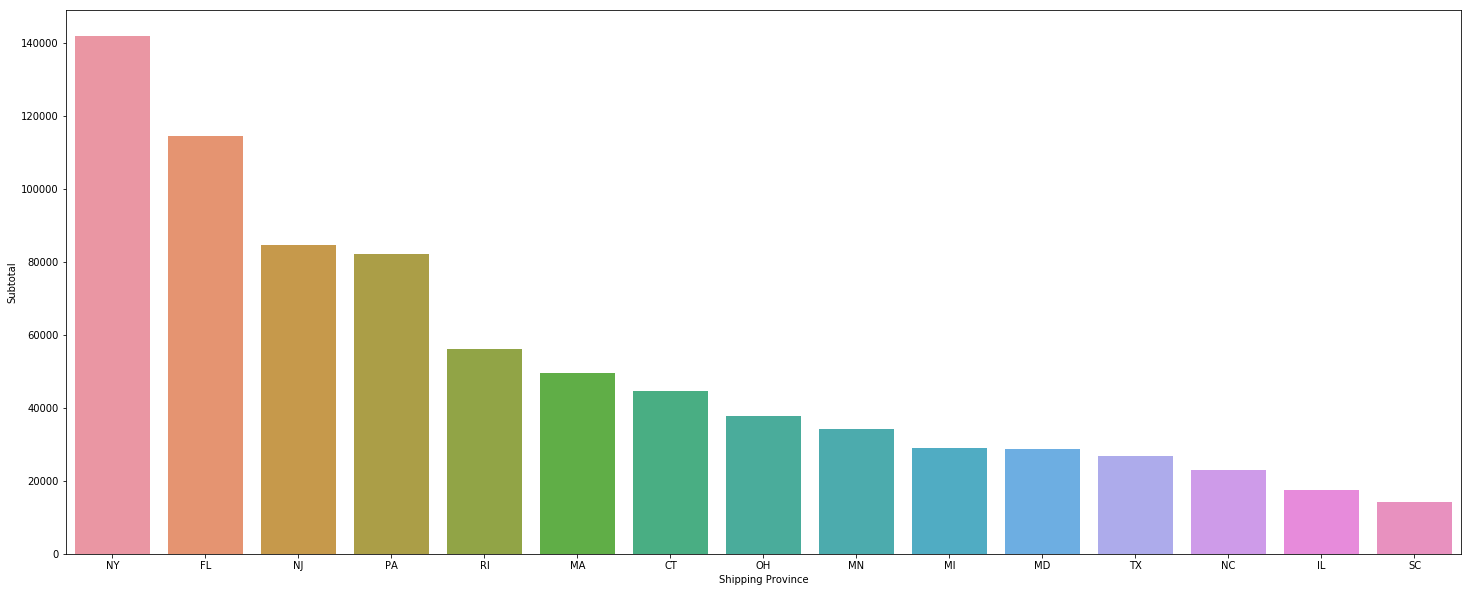

In [26]:
plt.figure(figsize=(25,10))
sns.barplot(x = 'Shipping Province', y = 'Subtotal', data = geodf)

## Calculate revenue

In [27]:
# fill na Discount amount na meaning it's 0
df['Discount Amount'].fillna(0, inplace=True)

In [28]:
# fill na Refunded Amount na meaning it's 0
df['Refunded Amount'].fillna(0, inplace=True)

In [29]:
# fill na Subtotal na meaning it's 0
df['Subtotal'].fillna(0, inplace=True)

In [30]:
df['revenue'] = df["Subtotal"] - df["Discount Amount"] - df["Refunded Amount"]

### Monthly revenue break down by year

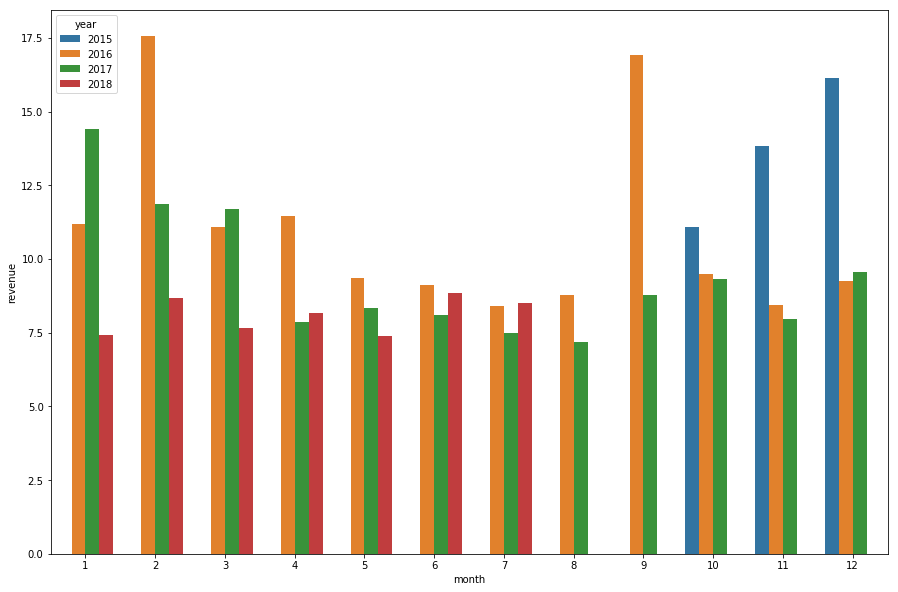

In [31]:
plt.figure(figsize=(15,10))
sns.barplot(x="month", y="revenue",hue="year",ci=None,data=df)

### Monthly revenue from 2015 to 2018

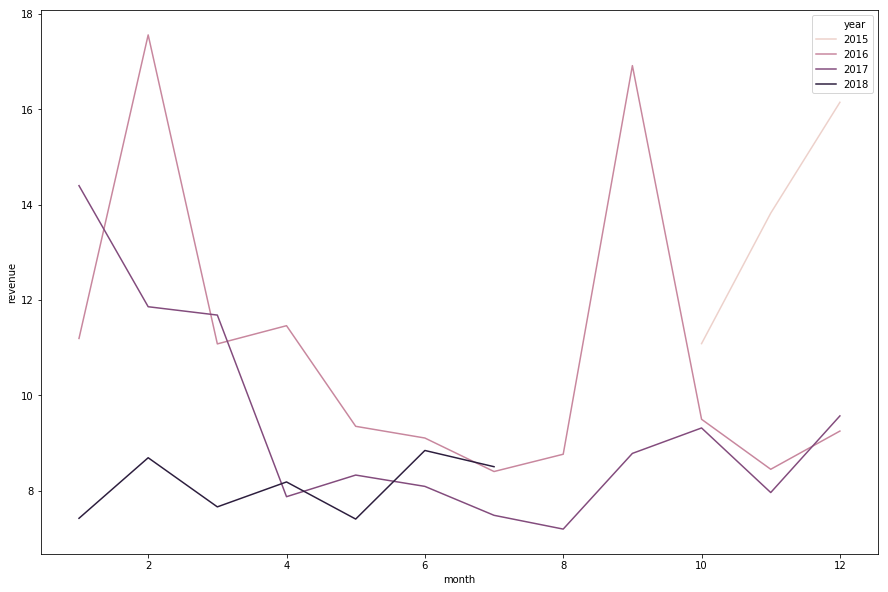

In [76]:
plt.figure(figsize=(15,10))
sns.lineplot(x="month", y="revenue", hue="year",ci=None,data=df)

## Top 20 vendors that generates the most revenue

In [33]:
df.groupby(['Vendor'])['revenue'].agg(sum).sort_values(ascending = False).head(20)

Vendor
USJewelryhouse      281960.80
romance              56343.81
Fresh                46277.89
Cloie                44898.62
US Jewelry House     26112.83
Dorothy              24951.91
andante              24712.13
IT'S sense           23933.17
Crystal Avenue       23882.36
Jennifer             18895.18
ruff-skch            16773.46
moment               14158.89
POMINA               12507.64
core                 12504.37
3AM                  11540.94
BARRING              11154.73
vera                  8965.27
jm                    8245.47
Stylist               7818.40
Hush                  6881.49
Name: revenue, dtype: float64

## Does higher line item drive higer revenue

### Most expensive line item

In [55]:
df.groupby('Lineitem name')['Lineitem price'].sum().sort_values(ascending = False).head(20)

Lineitem name
Kelly                                                 4176.00
Shipping and Handling                                 3550.00
Special Order                                         3344.86
Special Request                                       2121.30
Keren                                                 1093.05
Special Order - STERLING SILVER                        970.25
Urban Geometric Metal Hoop Earrings - Gold             833.75
Ash - 1+                                               795.50
Natural Bamboo Ark Handbag (Large)                     722.00
PO Security /deposit                                   697.50
Premium Cubic Zirconia Bridal Brass Necklace           650.00
Shelley                                                607.50
Holiday Edition - Glass Statement Necklace - Clear     600.73
Jessy                                                  570.00
Lightweight Urban Brass Earrings - Gold                563.75
Maria                                                  5

In [57]:
df.groupby('Lineitem name')['revenue'].sum().sort_values(ascending = False).head(20)

Lineitem name
Abstract Mini Pendant Long Necklace - 1+                          8766.91
Simple Metal Bar Pendant Necklace - Rhodium                       8318.40
Shipping and Handling                                             5574.00
Pastel Candy Total Spring Necklace - Pearl                        4600.00
Aloha Summer Pouch Bag - Beige                                    4456.00
Special Order                                                     4196.05
Kelly                                                             4004.43
Solid Shiny Formal Hand Clutch - Black                            4000.00
Glass Beads with Size Adjustable Suede Choker Necklace - Cream    3072.00
Plaid Check Winter Scarf                                          3029.25
Fringe With Various Charms - Turquoise                            3017.25
FREEDOM Message Bracelet - Gold                                   2746.00
CZ and Brass Evil Eye Pendant Necklace - Rose Gold                2670.18
I CAN & I WILL Message B

In [ ]:
category = []

In [87]:
temp = df['Lineitem name'].str.split(' - ', expand=True)

In [98]:
temp[1].unique()

array(['GDTQ', 'Size 8', 'Brown', ..., 'Black Diamond 12+', 'Pearl 12+',
       'Antique Silver'], dtype=object)

In [100]:
branches_of_sci = ['pink']

for branch in branches_of_sci:
    temp[branch] = temp.astype(str).sum(axis=1).str.contains(temp)

TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed